# Assignment 3

Imports

In [1]:
import numpy as np
import scipy as sp
from scipy.optimize import dual_annealing
from scipy.optimize import curve_fit
from scipy.integrate import solve_ivp
from scipy import stats as st
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
from tqdm import tqdm
from numba import jit, njit, prange
import math
import os
import sys
import sklearn as skl
import random
from scipy.integrate import odeint

Playground Raymond

In [2]:
if not os.path.isfile('predator-prey-data.csv'):
    raise FileNotFoundError("File 'predator-prey-data.csv' not found.")

df = pd.read_csv('predator-prey-data.csv')

In [3]:
PARAM_MIN = 0  # lower limit for parameters
PARAM_MAX = 2  # upper limit for parameters
MAX_STEPS = 500  # maximum number of steps in hill climbing
CALLS = 100  # number of calls in gp_minimize

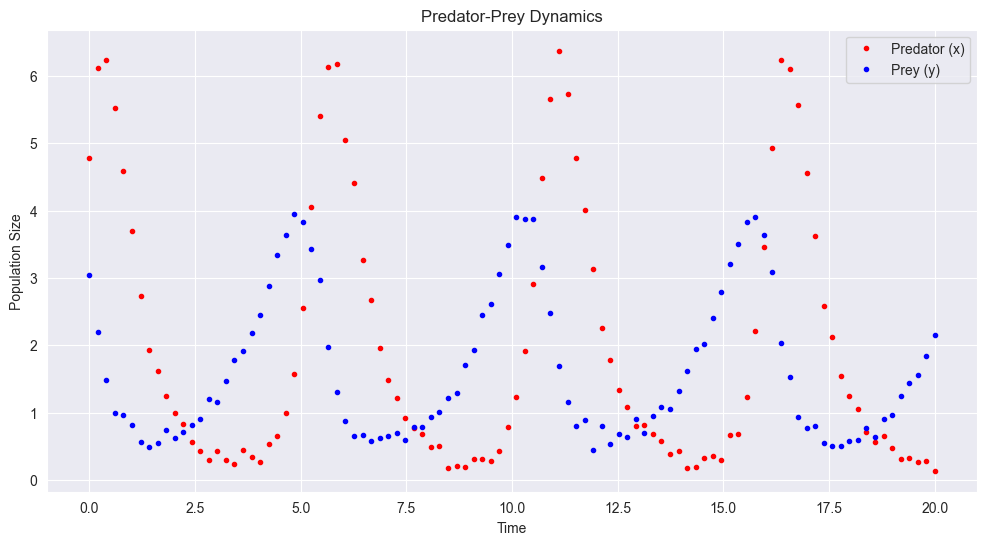

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(df['t'], df['x'], 'r.', label='Predator (x)')
plt.plot(df['t'], df['y'], 'b.', label='Prey (y)')
plt.title('Predator-Prey Dynamics')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
def lotka_volterra_simulation(params, initial_conditions, t):
    alpha, beta, gamma, delta = params

    def lotka_volterra_equations(y, t):
        x, z = y
        dxdt = alpha*x - beta*x*z
        dzdt = delta*x*z - gamma*z
        return [dxdt, dzdt]

    solution = odeint(lotka_volterra_equations, initial_conditions, t)
    return solution

In [6]:
def get_neighbors(solution, step_size=0.1):
    """Calculate the neighbors of a solution, given a step size."""
    neighbors = []
    for i in range(len(solution)):
        # Add step_size to the parameter if it doesn't exceed PARAM_MAX
        if solution[i] + step_size <= PARAM_MAX:
            neighbors.append([solution[j] if j != i else solution[i] + step_size for j in range(len(solution))])
        # Subtract step_size from the parameter if it doesn't become less than PARAM_MIN
        if solution[i] - step_size >= PARAM_MIN:
            neighbors.append([solution[j] if j != i else solution[i] - step_size for j in range(len(solution))])
    return neighbors

def choose_next_step(loss_function, current_step):
    neighbors = get_neighbors(current_step)
    return min(neighbors, key=loss_function)

def hill_climbing(loss_function, initial_step, max_steps):
    """Perform the Hill Climbing optimization algorithm."""
    current_step = initial_step
    history = [current_step]
    
    for _ in range(max_steps):
        try:
            next_step = choose_next_step(loss_function, current_step)
            if loss_function(next_step) >= loss_function(current_step):
                break
            history.append(next_step)
            current_step = next_step
        except Exception as e:
            print(f"An error occurred during the hill climbing: {str(e)}")
            break
            
    return current_step, history

In [7]:
def objective(params):
    experimental_data = df[['y', 'x']].values

    initial_conditions = [df['y'][0], df['x'][0]]
    
    t = df['t'].values
    
    simulated = lotka_volterra_simulation(params, initial_conditions, t)

    mse = np.mean((simulated - experimental_data) ** 2)
    return mse

In [8]:
def get_initial_guess():
    alpha = random.uniform(0, 2)
    beta = random.uniform(0, 2)
    gamma = random.uniform(0, 2)
    delta = random.uniform(0, 2)
    return [alpha, beta, gamma, delta]

In [9]:
def mae_objective(params):
    experimental_data = df[['y', 'x']].values

    initial_conditions = [df['y'][0], df['x'][0]]

    t = df['t'].values

    simulated = lotka_volterra_simulation(params, initial_conditions, t)

    mae = np.mean(abs(simulated - experimental_data))
    return mae

In [10]:
dimensions = [(PARAM_MIN, PARAM_MAX)] * 4
initial_guess = get_initial_guess()

final_solution_hc, history_hc = hill_climbing(objective, initial_guess, max_steps=MAX_STEPS)
print(f"Hill Climbing Final Solution: {final_solution_hc} with loss {objective(final_solution_hc)}")

mae_final_solution_hc, mae_history_hc = hill_climbing(mae_objective, initial_guess, max_steps=MAX_STEPS)
print(f"Hill Climbing (MAE) Final Solution: {mae_final_solution_hc} with loss {mae_objective(mae_final_solution_hc)}")

sa_final_solution_mse = dual_annealing(objective, bounds=dimensions, maxiter=CALLS)
print(f"Simulated Annealing Final Solution (MSE): {sa_final_solution_mse.x} with loss {objective(sa_final_solution_mse.x)}")

# Simulated Annealing for mae objective
sa_final_solution_mae = dual_annealing(mae_objective, bounds=dimensions, maxiter=CALLS)
print(f"Simulated Annealing Final Solution (MAE): {sa_final_solution_mae.x} with loss {mae_objective(sa_final_solution_mae.x)}")

Hill Climbing Final Solution: [1.7007133728510548, 1.0963113858360334, 0.592633228905689, 1.1110957304841746] with loss 3.4427071739846506
Hill Climbing (MAE) Final Solution: [1.7007133728510548, 0.8963113858360334, 0.592633228905689, 1.3110957304841748] with loss 1.488292696441919
Simulated Annealing Final Solution (MSE): [0.85987216 0.4396972  2.         1.15808828] with loss 0.009629703493138327
Simulated Annealing Final Solution (MAE): [0.87569069 0.44852475 1.96488009 1.14187706] with loss 0.07794378597168239


Playground Calvin

In [11]:
# Load Data
data = pd.read_csv('predator-prey-data.csv', index_col=0)

# Objective Functions
# Mean squared error

#mse = mean_squared_error(y_true, y_pred)

# Least Square
popt, pcov = curve_fit(func, xdata, ydata)


NameError: name 'func' is not defined

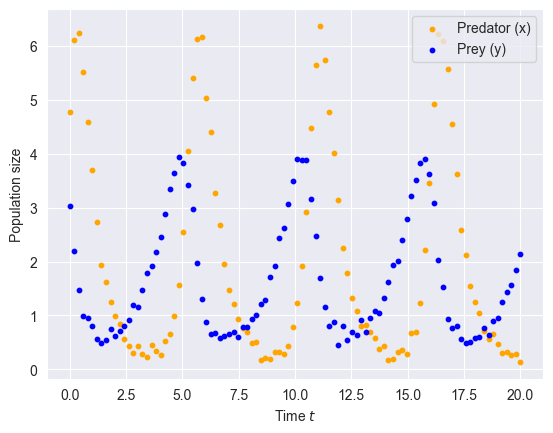

In [12]:
# Plot 
t = data['t']
x = data['x']
y = data['y']
plt.figure()
plt.scatter(t, x, label='Predator (x)', s=10, color='orange')
plt.scatter(t, y, label='Prey (y)', s=10, color='blue')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Population size')
plt.show()

In [13]:
print(data)

            t         x         y
0    0.000000  4.781635  3.035257
1    0.202020  6.114005  2.189746
2    0.404040  6.238361  1.478907
3    0.606061  5.520524  0.989836
4    0.808081  4.582546  0.957827
..        ...       ...       ...
95  19.191919  0.310346  1.241890
96  19.393939  0.324595  1.437257
97  19.595960  0.258083  1.562810
98  19.797980  0.283680  1.834171
99  20.000000  0.135956  2.147065

[100 rows x 3 columns]


Playground Jonas

In [14]:
def lv_model(x, t, alpha, beta, gamma, delta):
    """
    Lotka-Volterra model.
    """
    x1, x2 = x
    dx1 = alpha*x1 - beta*x1*x2
    dx2 = gamma*x1*x2 - delta*x2
    return np.array([dx1, dx2])

SEED = 33
np.random.seed(SEED)

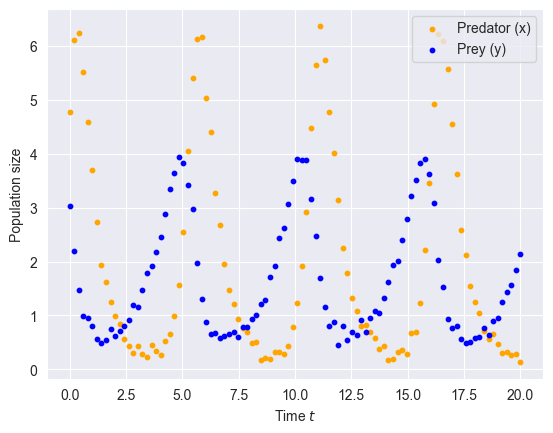

In [15]:
data = pd.read_csv('predator-prey-data.csv', index_col=0)
t = data['t']
x = data['x']
y = data['y']
plt.figure()
plt.scatter(t, x, label='Predator (x)', s=10, color='orange')
plt.scatter(t, y, label='Prey (y)', s=10, color='blue')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Population size')
plt.show()

C:\Users\13520\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\integrate\_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


Parameters: alpha = -1.171, beta = -0.776, gamma = -0.729, delta = -1.516


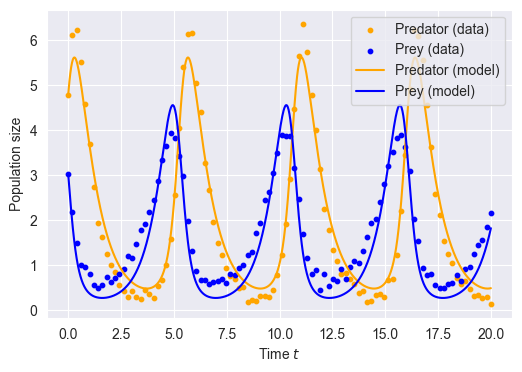

In [16]:
def objective_ls(params, t, x, y):
    """
    Cost function for the Lotka-Volterra model.
    """
    alpha, beta, gamma, delta = params
    x0, y0 = x[0], y[0]
    x_pred, y_pred = sp.integrate.odeint(lv_model, [x0, y0], t, args=(alpha, beta, gamma, delta)).T
    loss = np.sum((x_pred - x)**2 + (y_pred - y)**2)
    return loss

# TODO find smarter bounds
bounds = [(-2, 2), (-2, 2), (-2, 2), (-2, 3)]

res_ls = dual_annealing(objective_ls, args=(t, x, y), bounds=bounds, maxiter=1_000, no_local_search=True, seed=SEED)
alpha, beta, gamma, delta = res_ls.x

t_detail = np.linspace(0, 20, 1_000)
data = sp.integrate.odeint(lv_model, [x[0], y[0]], t_detail, args=(alpha, beta, gamma, delta)).T
x_ls, y_ls = data[0], data[1]
print(f'Parameters: alpha = {alpha:.3f}, beta = {beta:.3f}, gamma = {gamma:.3f}, delta = {delta:.3f}')

plt.figure(figsize=(6, 4))
plt.scatter(t, x, label='Predator (data)', s=10, color='orange')
plt.scatter(t, y, label='Prey (data)', s=10, color='blue')
plt.plot(t_detail, x_ls, label='Predator (model)', color='orange')
plt.plot(t_detail, y_ls, label='Prey (model)', color='blue')
plt.legend()
plt.xlabel('Time $t$')
plt.ylabel('Population size')
plt.show()

## General stuff about Lotka-Volterra equations

and any visualizations we need

Removing samples functionality

## Objective functions

## Optimization algorithms

In [ ]:
# Hill climbing

In [ ]:
# 3rd optimization algorithm

In [ ]:
# Simulated Annealing

## Experiments and plots

#### How many data-points from each time-series you could remove until you are not able to reverse-engineer the parameters any more?

First, try to ﬁnd the importance of each time-series on reverse-engineering process by ﬁxing one time-series and removing data-points from the other one. In this way, you will ﬁnd the critical number of data-points for each time-series.

Then, if you combine two reduced time-series, could you still infer the parameters?

Does removing every data-point have the same effect on reverse-engineering process? In other words, what are the points that you could remove safely without affecting the inferance procedure? and what are those with critical effects on the process?

#### \<Extra question\>